In [1]:
# activate the environment
# using Pkg; Pkg.activate("/Users/jacky/Documents/ECON-7084/")

# import the packages
using DataFrames, Distributions, Random, CSV, Plots
import StatsFuns: normpdf, normcdf

  Activating project at `~/Documents/ECON-7084`


### 2 Sign up NBER working paper series
1. what is the title of second paper listed on the NBER weekly working paper series(either from Sep. 5, Sep. 12, or Sep. 19)
  
- It's "Secessionism Mostly About Incom or Inequality? A Global Analysis of 3,003 Subnational Regions"

### 3 Sign up SRDA 
3. Which year did you download

- 2020

4. Plot rate of working against age(x-axis: mean of wrok dummy, y-axis: age) using ggplot2

In [4]:
PSFD_2020 = DataFrame(CSV.File("C00377_1/psfd_rr2020_v202208_csv.csv"));

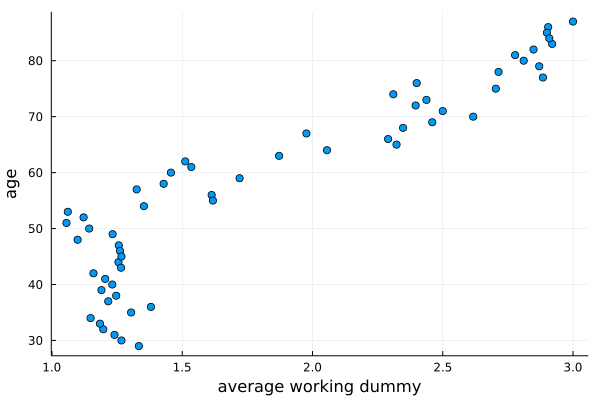

In [5]:
age = 111 .- PSFD_2020.a02a
y = unique(age)
index = [findall(x->x==i, age) for i in y]
work = PSFD_2020.w03
x = [mean(work[i]) for i in index]
scatter(x, y, label="", xlabel="average working dummy", ylabel="age")

### 4 Roy Model
##### 4.1 Review
1. show that 
- $\mathbb{E}[w_0|I] = \mu_0 + \frac{\sigma_0\sigma_1}{\sigma_v}(\rho-\frac{\sigma_0}{\sigma_1})(\frac{\phi(z)}{1-\Phi(z)})$
- $\mathbb{E}[w_1|I] = \mu_1 + \frac{\sigma_0\sigma_1}{\sigma_v}(\frac{\sigma_1}{\sigma_1}-\rho)(\frac{\phi(z)}{1-\Phi(z)})$

$$
    \mathbb{E}[w_0|I] = \mathbb{E}[\mu_0+\epsilon_0 | \mu_1+\epsilon_1-C > \mu_0 + \epsilon_0]
    =\mathbb{E}[\mu_0+\epsilon_0 | \epsilon_1-\epsilon_0 > \mu_0 - \mu_1 + C] \\
    =\mathbb{E}[\mu_0+\epsilon_0 | \frac{\epsilon_1-\epsilon_0}{\sigma_v} > \frac{\mu_0 - \mu_1 + C}{\sigma_v}] =\mathbb{E}[\mu_0+\epsilon_0 | \frac{v}{\sigma_v} > Z]
    =\mu_0+\sigma_0\mathbb{E}[\frac{\epsilon_0}{\sigma_0} | \frac{v}{\sigma_v} > Z]
$$
$$
    \mathbb{E}[\frac{\epsilon_0}{\sigma_0} | \frac{v}{\sigma_v}] = \frac{\mathbb{Cov}[\frac{\epsilon_0}{\sigma_0}, \frac{v}{\sigma_v}]}{\mathbb{Var}[\frac{v}{\sigma_v}]}\frac{v}{\sigma_v}
    =\frac{1}{\sigma_0\sigma_v}\mathbb{Cov}[\epsilon_0, v]\frac{v}{\sigma_v}
    =\frac{\sigma_{0,v}}{\sigma_0\sigma_v}\frac{v}{\sigma_v}
    =\rho_{0, v}\frac{v}{\sigma_v}
$$
$$
   \mathbb{E}[w_0|I] = \mu_0+\sigma_0\mathbb{E}[\frac{\epsilon_0}{\sigma_0} | \frac{v}{\sigma_v} > Z]
   = \mu_0+\sigma_0\mathbb{E}[\mathbb{E}[\frac{\epsilon_0}{\sigma_0} | \frac{v}{\sigma_v}] | \frac{v}{\sigma_v} > Z]
   =\mu_0+\sigma_0\mathbb{E}[\rho_{0, v}\frac{v}{\sigma_v} | \frac{v}{\sigma_v} > Z]\\
   =\mu_0+\sigma_0\rho_{0, v}\mathbb{E}[\frac{v}{\sigma_v} | \frac{v}{\sigma_v} > Z] 
$$
$$
    \mathbb{E}[\frac{v}{\sigma_v} | \frac{v}{\sigma_v} > Z] = \int_Z^{\infty} \frac{v}{\sigma_v}\phi(\frac{v}{\sigma_v})\frac{1}{1-\Phi(Z)}d\frac{v}{\sigma_v}
    =\frac{-1}{1-\Phi(Z)} \int_Z^{\infty}-x\phi(x)dx, \ where \ x=\frac{v}{\sigma_v}
    =\frac{-1}{1-\Phi(Z)} \phi(x) |_z^{\infty} \\
    =\frac{\phi(Z)}{1-\Phi(Z)} 
$$
$$
   \mathbb{E}[w_0|I]=\mu_0+\sigma_0\rho_{0, v}\mathbb{E}[\frac{v}{\sigma_v} | \frac{v}{\sigma_v} > Z]
   =\mu_0+\sigma_0\rho_{0, v}\frac{\phi(Z)}{1-\Phi(Z)}
$$
$$
    \sigma_0\rho_{0, v}=\sigma_0\frac{\sigma_{0, v}}{\sigma_0\sigma_v}=\mathbb{Cov}[\epsilon_0, \epsilon_1-\epsilon_0]\frac{1}{\sigma_v}
    =\frac{\sigma_0\sigma_1}{\sigma_v}(\frac{\sigma_{0, 1}}{\sigma_0\sigma_1}-\frac{\sigma_0}{\sigma_1})
    = \frac{\sigma_0\sigma_1}{\sigma_v}(\rho-\frac{\sigma_0}{\sigma_1})
$$
$$
    \Rightarrow\mathbb{E}[w_0|I] = \mu_0 + \frac{\sigma_0\sigma_1}{\sigma_v}(\rho-\frac{\sigma_0}{\sigma_1})\frac{\phi(Z)}{1-\Phi(Z)}
$$

- with similar calculatio, we can prove that $\mathbb{E}[w_1|I] = \mu_1 + \frac{\sigma_0\sigma_1}{\sigma_v}(\frac{\sigma_1}{\sigma_1}-\rho)(\frac{\phi(z)}{1-\Phi(z)})$

2. 
- if $Q_0>0, Q_1<0$ then $\rho>\frac{\sigma_0}{\sigma_1}$ and $\rho>\frac{\sigma_1}{\sigma_0}$ 
- but since $0\leq\rho\leq1, \rho^2 > \frac{\sigma_0}{\sigma_1}\frac{\sigma_1}{\sigma_0}=1$
- there is an contradiction

##### 4.2 Simulation

In [6]:
# 1. Picy your favorite value for this set of parameters(μ₀, μ₁, σ₀, σ₁, σ₀₁, C)
μ₀, μ₁, σ₀, σ₁, σ₀₁, C = 400., 420., .8, 1.2, .75, 20
ρ = σ₀₁ / (σ₀*σ₁)
n = Int(1e7)

Random.seed!(20220918);

In [7]:
# 2. Simulate the ϵ₀, ϵ₁ for N=10 million individuals. Use a data.table to store this
μ = zeros(2)
Σ = [σ₁^2 σ₀₁; σ₀₁ σ₀^2]
draw = rand(MvNormal(μ, Σ), n)
ϵ₁, ϵ₀ = draw[1, :], draw[2, :]

# 3. create the column for w₀, w₁
df1 = DataFrame(ϵ₁=ϵ₁, ϵ₀=ϵ₀, C=C, w₁=μ₁.+ϵ₁, w₀=μ₀.+ϵ₀)

# 4. Generate the column I that take binary value
df1.I = df1.w₁ - df1.C .>= df1.w₀

target = df1.I .== 1

# 5. Calculater E[w₀|I], E[w₁|I], Q₀, Q₁ from data without invoking equation (1) (2)
sample_mean_multi_w₀ = mean(df1.w₀[target])
sample_mean_multi_w₁ = mean(df1.w₁[target])

@show mean(df1.ϵ₀[target])
@show mean(df1.ϵ₁[target]);

mean(df1.ϵ₀[target]) = 0.11566857308897964
mean(df1.ϵ₁[target]) = 0.7233921729682333


In [8]:
# 6. Calcualte RHS of equaiotn (1) and (2) to compare with previous quesion
σᵥ = std(df1.ϵ₁[target]-df1.ϵ₀[target])

function population_mean_w₀(σᵥ=σᵥ, μ₀=μ₀, μ₁=μ₁, σ₀=σ₀, σ₁=σ₁, ρ=ρ, C=C)
    Z = (μ₀-μ₁+C) / σᵥ
    return μ₀ + (σ₀*σ₁/σᵥ) * (ρ-σ₀/σ₁) * (normpdf(Z)/1-normcdf(Z)) 
end
function population_mean_w₁(σᵥ=σᵥ, μ₀=μ₀, μ₁=μ₁, σ₀=σ₀, σ₁=σ₁, ρ=ρ, C=C)
    Z = (μ₀-μ₁+C) / σᵥ
    μ₁ + (σ₀*σ₁/σᵥ) * (σ₁/σ₀-ρ) * (normpdf(Z)/1-normcdf(Z)) 
end

population_mean_w0 = population_mean_w₀()
population_mean_w1 = population_mean_w₁();

In [9]:
@show sample_mean_multi_w₀
@show population_mean_w0

@show sample_mean_multi_w₁
@show population_mean_w1;

sample_mean_multi_w₀ = 400.115668573089
population_mean_w0 = 399.9757840601324
sample_mean_multi_w₁ = 420.72339217296826
population_mean_w1 = 419.84810001355777


7. Which columns are observed in the real world? Which of them are not?
- If I == 1, then $w_0$ is unobservable 
- If I == 0, then $w_1$ is unobservable 

### 5 Roy Model is Everywhere
1. Find an example in applied economics

2. Use the Roy model notaion to write down a (simple version) of the research question
- graduate or get an master degree?
- assumptions: 
    1. only salaries or even future salary will be considered  by the bachelor graduate
    2. the only cost(C) is the preparation devoted in applyling master program 
- setup:
    1. $\mu_1$ is the average lifetime wealth of person who has master degree while $\mu_0$ is the other
    2. individual heterogenous effects are contolled by $\epsilon_1$ and $\epsilon_0$ respectfully
    3. if $\mu_1 + \epsilon_1 - C >= \mu_0 + \epsilon_0$ than one will go to graduate school
1. Explain this to (any) other people use both the intuition and the mathematical frame-work

### <span style="color:#EBCB8B" >Extension: gibbs sampling and not multinormal</span>
#####  <span style="color:#D08770">case 1: use the gibbs sampling algorithm</span>

In [10]:
# 2. Simulate the ϵ₀, ϵ₁ for N=10 million individuals. Use a data.table to store this
# use the gibbs sampling to simulate
struct gibbs_parameter
    μ₁::Float64
    σ₁::Float64
    μ₀::Float64
    σ₀::Float64
    ρ::Float64
    n::Int64
    seed::NamedTuple
    skip::Int64
end

function gibbs_parameter(; μ₁, σ₁, μ₀, σ₀, ρ, n, seed, skip=100)
    skip > n && error("the skip amount can not be larger than n")
    return gibbs_parameter(μ₁, σ₁, μ₀, σ₀, ρ, n, seed, skip)
end

# conditional on ϵ₁
f(ϵ₁::Float64, p::gibbs_parameter) = rand(Normal(0+p.ρ*(p.σ₀/p.σ₁)*(ϵ₁-0),
                                                 p.σ₀*sqrt(1-p.ρ^2)))
# conditional on ϵ₀
g(ϵ₀::Float64, p::gibbs_parameter) = rand(Normal(0+p.ρ*(p.σ₁/p.σ₀)*(ϵ₀-0),
                                                 p.σ₁*sqrt(1-p.ρ^2)))


function gibbs_sampling(θ::gibbs_parameter)
    draw_ϵ₁, draw_ϵ₀, ϵ₀ = zeros(θ.n+θ.skip), zeros(θ.n+θ.skip), θ.seed.ϵ₀
    for i = eachindex(draw_ϵ₁, draw_ϵ₀)
        ϵ₁ = g(ϵ₀, θ)
        ϵ₀ = f(ϵ₁, θ)
        draw_ϵ₁[i] = ϵ₁
        draw_ϵ₀[i] = ϵ₀
    end
    return DataFrame(ϵ₁=draw_ϵ₁[θ.skip+1:end], ϵ₀=draw_ϵ₀[θ.skip+1:end])
end

gibbs_sampling (generic function with 1 method)

In [11]:
Random.seed!(20220918)
param = gibbs_parameter(μ₁=μ₁, σ₁=σ₁, μ₀=μ₀, σ₀=σ₀, ρ=ρ, n=n, seed=(ϵ₁=65., ϵ₀=45.))
df2 = gibbs_sampling(param)

# 3. create the column for w₀, w₁
df2.C .= C
df2.w₁ = μ₁ .+ df2.ϵ₁
df2.w₀ = μ₀ .+ df2.ϵ₀;

# 4. Generate the column I that take binary value
df2.I = df2.w₁ - df2.C .>= df2.w₀

# 5. Calculater E[w₀|I], E[w₁|I], Q₀, Q₁ from data without invoking equation (1) (2)
target = df2.I .== 1
sample_mean_multi_w₀ = mean(df2.w₀[target]) 
sample_mean_multi_w₁ = mean(df2.w₁[target])

# 6. Calcualte RHS of equaiotn (1) and (2) to compare with previous quesion
@show Q₀ = mean(df2.ϵ₀[target])
@show Q₁ = mean(df2.ϵ₁[target]);

Q₀ = mean(df2.ϵ₀[target]) = 0.11553450284961245
Q₁ = mean(df2.ϵ₁[target]) = 0.7234616130188586


In [12]:
@show sample_mean_multi_w₀
@show population_mean_w0

@show sample_mean_multi_w₁
@show population_mean_w1;

sample_mean_multi_w₀ = 400.11553450284964
population_mean_w0 = 399.9757840601324
sample_mean_multi_w₁ = 420.72346161301886
population_mean_w1 = 419.84810001355777


#####  <span style="color:#D08770">case 2: not multinormal(univariate)<span>

In [13]:
# 2. Simulate the ϵ₀, ϵ₁ for N=10 million individuals. Use a data.table to store this
df3 = DataFrame(ϵ₁=rand(Normal(0, σ₁), n), ϵ₀=rand(Normal(0, σ₀), n), C=C)

# 3. create the column for w₀, w₁
df3.w₁ = μ₁ .+ df3.ϵ₁
df3.w₀ = μ₀ .+ df3.ϵ₀

# 4. Generate the column I that take binary value
df3.I = df3.w₁ - df3.C .>= df3.w₀

# 5. Calculater E[w₀|I], E[w₁|I], Q₀, Q₁ from data without invoking equation (1) (2)
target = df3.I .== 1
sample_mean_w₀ = mean(df3.w₀[target])  # E[w₀|I]
sample_mean_w₁ = mean(df3.w₁[target])  # E[w₁|I]

@show Q₀ = mean(df3.ϵ₀[target])
@show Q₁ = mean(df3.ϵ₁[target]);

Q₀ = mean(df3.ϵ₀[target]) = -0.35417979625931634
Q₁ = mean(df3.ϵ₁[target]) = 0.7966859017963553


In [14]:
@show sample_mean_w₀
@show population_mean_w0

@show sample_mean_w₁
@show population_mean_w1;

sample_mean_w₀ = 399.6458202037407
population_mean_w0 = 399.9757840601324
sample_mean_w₁ = 420.79668590179637
population_mean_w1 = 419.84810001355777
